In [17]:
nombre = 'LOPEZ SHERIFF Estrella'

In [18]:
df_comp = df[df.local==nombre].copy()

In [19]:
df_comp.time = df_comp.time.apply(lambda t: int(t.split(':')[0])*60 + int(t.split(':')[1]))

In [20]:
df_comp['minute'] = (df_comp.time.astype(int) / 60).astype(int)

In [21]:
dict_action_simple = {
    'Shido': 'sancion', 
    'HSK (3rd shido)': 'sancion', 
    'Hansoku-Make': 'sancion',
    'Yuko': 'marca',
    'Waza-ari': 'marca', 
    'Waza-Ari-awasete-ippon': 'marca',
    'Ippon': 'marca', 
    'Cancel Yuko': 'cancel',
    'Cancel Waza-ari': 'cancel', 
    'Cancel Ippon': 'cancel', 
    'Cancel Shido': 'cancel'
}

df_comp['action_simple'] = df_comp.action.map(dict_action_simple)

dict_action_simple_2 = {
    0: {'sancion': 'shido_other', 'marca': 'le_marcan', 'cancel': 'cancel'}, 
    1: {'sancion': 'shido_ella', 'marca': 'marca_ella', 'cancel': 'cancel'}
}

df_comp['action_simple'] = df_comp.apply(lambda a: dict_action_simple_2[a.you][a.action_simple], axis=1)

Cada fila es una acción en un combate, donde:

__you__ = 1 significa que es tuyo (el shido, wazari...)  
__you__ = 0 significa que es del oponente

In [22]:
df_comp.head(10)

,local,opponent,you,action,action_detail,time,url_youtube,event,minute,action_simple
650,LOPEZ SHERIFF Estrella,PARK Da Sol,1,Shido,Shido / False-Attack,15,https://judobase.ijf.org/#/competition/contest/gs_jpn2018_w_0052_0012,Grand Slam Osaka 2018,0,shido_ella
651,LOPEZ SHERIFF Estrella,PARK Da Sol,0,Shido,Shido / False-Attack,89,https://judobase.ijf.org/#/competition/contest/gs_jpn2018_w_0052_0012,Grand Slam Osaka 2018,1,shido_other
652,LOPEZ SHERIFF Estrella,PARK Da Sol,1,Shido,Shido / Non-Combativity,218,https://judobase.ijf.org/#/competition/contest/gs_jpn2018_w_0052_0012,Grand Slam Osaka 2018,3,shido_ella
653,LOPEZ SHERIFF Estrella,PARK Da Sol,0,Ippon,Koshi-waza / Sode-tsurikomi-goshi,226,https://judobase.ijf.org/#/competition/contest/gs_jpn2018_w_0052_0012,Grand Slam Osaka 2018,3,le_marcan
654,LOPEZ SHERIFF Estrella,JIMENEZ Kristine,1,Waza-ari,Ashi-waza / Ko-soto-gake,9,https://judobase.ijf.org/#/competition/contest/gp_ned2018_w_0052_0014,Grand Prix The Hague 2018,0,marca_ella
655,LOPEZ SHERIFF Estrella,JIMENEZ Kristine,0,Shido,Shido / Non-Combativity,156,https://judobase.ijf.org/#/competition/contest/gp_ned2018_w_0052_0014,Grand Prix The Hague 2018,2,shido_other
656,LOPEZ SHERIFF Estrella,PUPP Reka,1,Shido,Shido / Non-Combativity,82,https://judobase.ijf.org/#/competition/contest/gp_ned2018_w_0052_0023,Grand Prix The Hague 2018,1,shido_ella
657,LOPEZ SHERIFF Estrella,PUPP Reka,1,Shido,Shido / Non-Combativity,185,https://judobase.ijf.org/#/competition/contest/gp_ned2018_w_0052_0023,Grand Prix The Hague 2018,3,shido_ella
658,LOPEZ SHERIFF Estrella,PUPP Reka,0,Waza-ari,Koshi-waza / Sode-tsurikomi-goshi,240,https://judobase.ijf.org/#/competition/contest/gp_ned2018_w_0052_0023,Grand Prix The Hague 2018,4,le_marcan
659,LOPEZ SHERIFF Estrella,GNETO Astride,1,Shido,Shido / False-Attack,31,https://judobase.ijf.org/#/competition/contest/gs_ger2018_w_0052_0033,Grand Slam Dusseldorf 2018,0,shido_ella


In [23]:
total_acciones = df_comp.shape[0]
total_batallas = df_comp[["opponent", "event"]].drop_duplicates().shape[0]

In [24]:
print(f'Es decir, un total de {total_acciones} acciones en {total_batallas} batallas')

Es decir, un total de 82 acciones en 23 batallas


In [25]:
resumen = dict()

In [26]:
resumen['total_batallas'] = total_batallas

In [27]:
golden_score = (df_comp.groupby(["opponent", "event"]).time.max() > 240).sum()
resumen['golden_score'] = f'{golden_score} ({str(golden_score / total_batallas *100)}%)'

In [28]:
battles = conn.as_pandas(f'select * from battles where local="{nombre}"', 
                         index_col='index').sort_values('date', ascending=False)
temp = df_comp.groupby(["opponent", "event"]).time.max()
golden_score_wins = battles.set_index(['opponent', 'event']).loc[temp.index[temp > 240]].wins.sum()
resumen['golden_score_wins'] = f'{golden_score_wins} ({golden_score_wins / golden_score * 100}%)'

In [29]:
resumen

{'total_batallas': 23,
 'golden_score': '4 (17.391304347826086%)',
 'golden_score_wins': '1 (25.0%)'}

Agrupamos por sujeto y acción

In [30]:
grouped_actions = df_comp.groupby(['you', 'action']).size() 
grouped_actions

you  action                
0    Cancel Waza-ari            2
     HSK (3rd shido)            2
     Ippon                      4
     Shido                     22
     Waza-Ari-awasete-ippon     2
     Waza-ari                  16
1    Ippon                      3
     Shido                     21
     Waza-Ari-awasete-ippon     1
     Waza-ari                   9
dtype: int64

In [31]:
print(f'Por ejemplo, hiciste {grouped_actions[1, "Ippon"]} Ippones y recibiste {grouped_actions[1, "Shido"]} Shidos')

Por ejemplo, hiciste 3 Ippones y recibiste 21 Shidos


### Acciones por minuto

In [32]:
import seaborn as sns

In [33]:
grouped_actions = df_comp.groupby(['minute', 'action_simple']).size()
grouped_actions

minute  action_simple
0       le_marcan         5
        marca_ella        3
        shido_ella        5
        shido_other       5
1       le_marcan         6
        marca_ella        3
        shido_ella        3
        shido_other       3
2       cancel            2
        le_marcan         2
        marca_ella        2
        shido_ella        7
        shido_other       4
3       le_marcan         4
        marca_ella        4
        shido_ella        5
        shido_other      11
4       le_marcan         3
        marca_ella        1
        shido_other       1
5       le_marcan         1
        shido_ella        1
6       le_marcan         1
dtype: int64

In [34]:
ga = grouped_actions.to_frame().reset_index().rename(columns={0: 'count'})

In [35]:
ga.head()

,minute,action_simple,count
0,0,le_marcan,5
1,0,marca_ella,3
2,0,shido_ella,5
3,0,shido_other,5
4,1,le_marcan,6


In [36]:
%matplotlib notebook

In [37]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


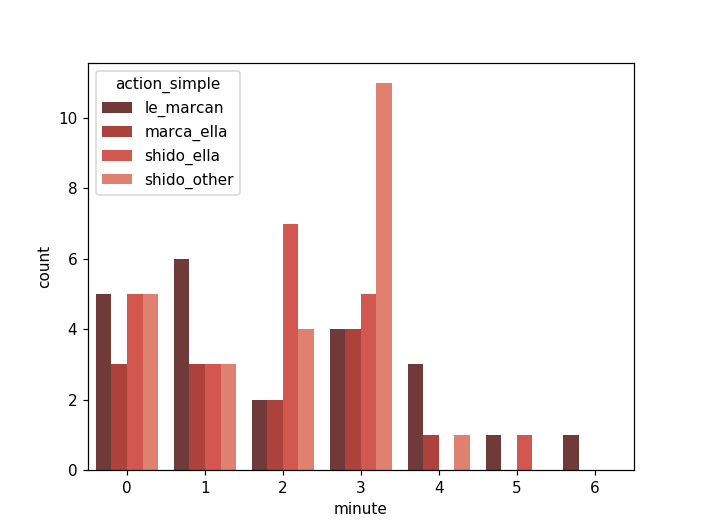

In [43]:
fig, ax = plt.subplots()
sns.barplot(x="minute", y="count", hue="action_simple", data=ga.query('action_simple!="cancel"'), palette="Reds_d")

<IPython.core.display.Javascript object>


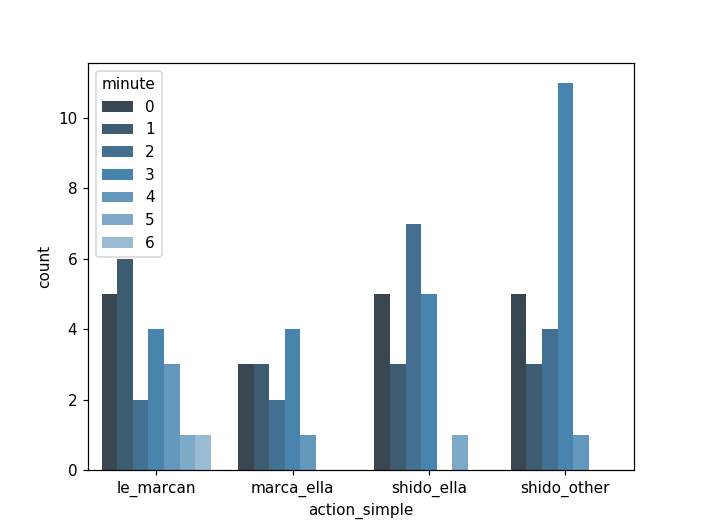

In [41]:
fig, ax = plt.subplots()
ax = sns.barplot(x="action_simple", y="count", hue="minute", data=ga.query('action_simple!="cancel"'), palette="Blues_d")

### Detail Estrella

In [44]:
gad = df.groupby(['you', 'action_detail']).size().to_frame().reset_index().rename(columns={0: 'count', 'you': 'a_quien'})
shidos = gad[gad.action_detail.str.contains('Shido')].copy()
shidos.action_detail = shidos.action_detail.str.slice(7)

In [45]:
shidos.a_quien = shidos.a_quien.map({0: 'al_otro', 1: 'a_ella'})

In [46]:
shidos.head()

,a_quien,action_detail,count
40,al_otro,Avoid-Grip,36
41,al_otro,Bend-Opps-Fingers,1
42,al_otro,Defensive-Posture,33
43,al_otro,Escape-With-Head,11
44,al_otro,False-Attack,66


<IPython.core.display.Javascript object>


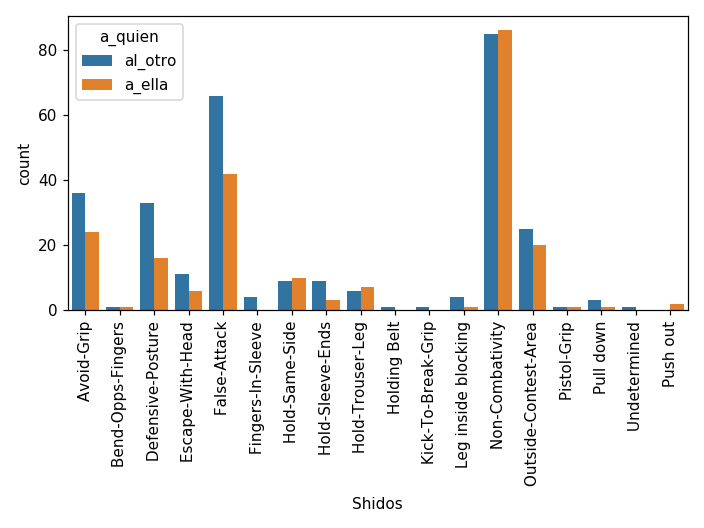

Text(0.5, -116.10277777777777, 'Shidos')

In [47]:
fig, ax = plt.subplots()
ax = sns.barplot(x="action_detail", y="count", hue="a_quien", data=shidos)
for item in ax.get_xticklabels():
    item.set_rotation(90)
fig.tight_layout()
ax.set_xlabel('Shidos')

<IPython.core.display.Javascript object>


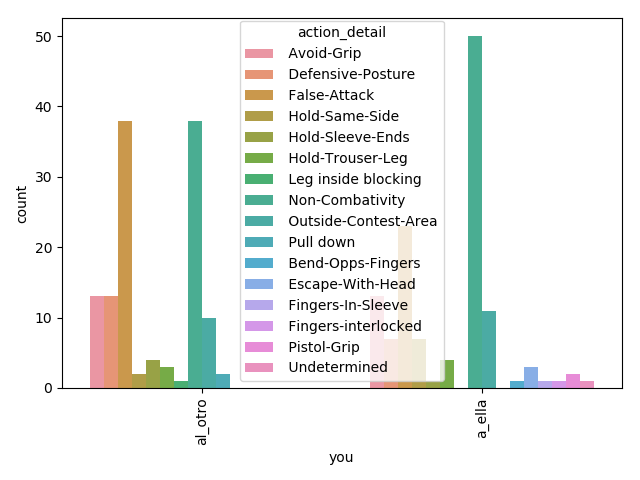

In [234]:
fig, ax = plt.subplots()
ax = sns.barplot(x="you", y="count", hue="action_detail", data=shidos)
for item in ax.get_xticklabels():
    item.set_rotation(90)
fig.tight_layout()

### Battles Gaitero

In [9]:
# dataframe containing battles info
df = conn.as_pandas('select * from gaite')

Cada fila es una acción en un combate, donde:

__you__ = 1 significa que es tuyo (el shido, wazari...)  
__you__ = 0 significa que es del oponente

In [10]:
df.head(10)

,opponent,you,action,action_detail,time,url_youtube,event
0,SHMAILOV Baruch,1,Shido,Shido / False-Attack,00:22,https://judobase.ijf.org/#/competition/contest/gp_ned2018_m_0066_0055,Grand Prix The Hague 2018
1,SHMAILOV Baruch,0,Shido,Shido / False-Attack,01:28,https://judobase.ijf.org/#/competition/contest/gp_ned2018_m_0066_0055,Grand Prix The Hague 2018
2,SHMAILOV Baruch,1,Shido,Shido / Hold-Trouser-Leg,03:55,https://judobase.ijf.org/#/competition/contest/gp_ned2018_m_0066_0055,Grand Prix The Hague 2018
3,SHMAILOV Baruch,0,Ippon,Ashi-waza / Uchi-mata,04:23,https://judobase.ijf.org/#/competition/contest/gp_ned2018_m_0066_0055,Grand Prix The Hague 2018
4,BAI Zhijie,1,Shido,Shido / Avoid-Grip,01:34,https://judobase.ijf.org/#/competition/contest/gp_ned2018_m_0066_0046,Grand Prix The Hague 2018
5,BAI Zhijie,1,Shido,Shido / Fingers-interlocked,02:10,https://judobase.ijf.org/#/competition/contest/gp_ned2018_m_0066_0046,Grand Prix The Hague 2018
6,BAI Zhijie,1,Waza-ari,Koshi-waza / Sode-tsurikomi-goshi,02:42,https://judobase.ijf.org/#/competition/contest/gp_ned2018_m_0066_0046,Grand Prix The Hague 2018
7,SHERSHAN Dzmitry,1,Shido,Shido / Non-Combativity,04:50,https://judobase.ijf.org/#/competition/contest/gs_uae2018_m_0066_0033,Grand Slam Abu Dhabi 2018
8,SHERSHAN Dzmitry,1,Cancel Ippon,,05:31,https://judobase.ijf.org/#/competition/contest/gs_uae2018_m_0066_0033,Grand Slam Abu Dhabi 2018
9,SHERSHAN Dzmitry,0,Ippon,Yoko-sutemi-waza / O-soto-makikomi,08:43,https://judobase.ijf.org/#/competition/contest/gs_uae2018_m_0066_0033,Grand Slam Abu Dhabi 2018


In [11]:
print(f'Es decir, un total de {df.shape[0]} acciones en {df[["opponent", "event"]].drop_duplicates().shape[0]} batallas')

Es decir, un total de 99 acciones en 29 batallas


Agrupamos por sujeto y acción

In [12]:
grouped_actions = df.groupby(['you', 'action']).size()
grouped_actions

you  action         
0    Cancel Shido        1
     HSK (3rd shido)     5
     Ippon               6
     Shido              24
     Waza-ari            6
1    Cancel Ippon        2
     Cancel Waza-ari     1
     HSK (3rd shido)     4
     Ippon               1
     Shido              38
     Waza-ari           11
dtype: int64

In [13]:
print(f'Por ejemplo, hiciste {grouped_actions[1, "Ippon"]} Ippones y recibiste {grouped_actions[1, "Shido"]} Shidos')

Por ejemplo, hiciste 1 Ippones y recibiste 38 Shidos


### Detail Gaitero

In [14]:
df.groupby(['you', 'action_detail']).size()

you  action_detail                     
0    Ashi-waza / Ko-uchi-gari               1
     Ashi-waza / O-uchi-gari                2
     Ashi-waza / Uchi-mata                  1
     Koshi-waza / Sode-tsurikomi-goshi      1
     Koshi-waza / Tsuri-goshi               1
     Osaekomi-waza / Kesa-gatame            1
     Osaekomi-waza / Ura-gatame             1
     Osaekomi-waza / Yoko-shiho-gatame      1
     Shido / Avoid-Grip                     1
     Shido / Defensive-Posture              2
     Shido / False-Attack                  11
     Shido / Hold-Same-Side                 1
     Shido / Non-Combativity               11
     Shido / Outside-Contest-Area           4
     Te-waza / Seoi-nage                    1
     Te-waza / Tai-otoshi                   1
     Yoko-sutemi-waza / O-soto-makikomi     1
1                                           4
     Ashi-waza / O-uchi-gaeshi              1
     Ashi-waza / Uchi-mata-gaeshi           1
     Koshi-waza / Sode-tsurikomi-goshi  